In [207]:
# Assignment 2: Feed-forward Neural Network using Keras & TensorFlow

# -----------------------------
# a) Import necessary packages
# -----------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np


Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


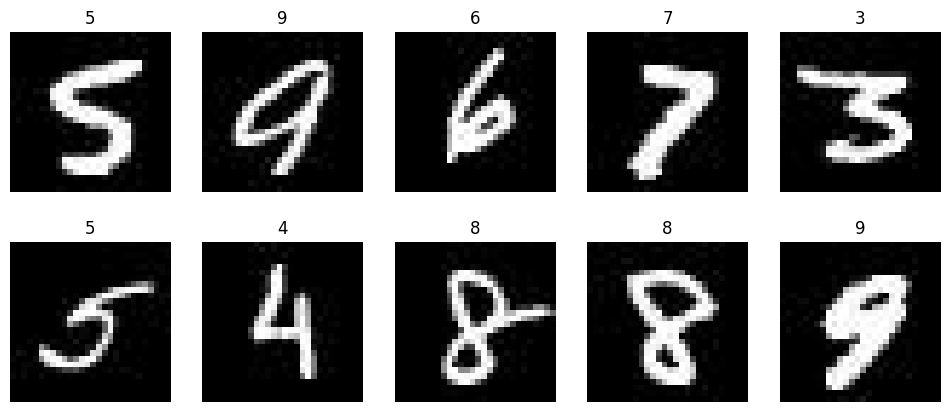

In [215]:
# -----------------------------
# b) Load training/testing data (MNIST)
# -----------------------------
train_dir = "/Users/mayur/Downloads/DL for AI/mnist-jpg/train"
test_dir  = "/Users/mayur/Downloads/DL for AI/mnist-jpg/test"

train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)
x_train, y_train = next(iter(train_ds.unbatch().batch(6000)))
x_test, y_test   = next(iter(test_ds.unbatch().batch(1000)))

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.figure(figsize=(12, 5))
for i in range (10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(int(y_train[i]))
    plt.axis('off')
plt.show()

In [216]:
# ------------------------------------
# c. Defining the model’s architecture
# ------------------------------------

model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten 28x28 image to 784 feature vector
    Dense(256, activation='relu'),          # Hidden layer
    Dense(128, activation='relu'),          # Hidden layer
    Dense(10, activation='softmax')         # Output layer (10 classes)
])

model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
# -----------------------------
# d) Train using SGD
# -----------------------------
model.compile(optimizer=SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3391 - loss: 2.0767 - val_accuracy: 0.7500 - val_loss: 1.2816
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.7601 - loss: 1.0965 - val_accuracy: 0.8300 - val_loss: 0.7667
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8459 - loss: 0.6710 - val_accuracy: 0.8517 - val_loss: 0.5984
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8619 - loss: 0.5242 - val_accuracy: 0.8817 - val_loss: 0.5075
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8850 - loss: 0.4499 - val_accuracy: 0.8883 - val_loss: 0.4623
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8866 - loss: 0.4185 - val_accuracy: 0.8900 - val_loss: 0.4212
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.8999 - loss: 0.3770 - val_accuracy: 0.8950 - val_loss: 0.3995
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9072 - loss: 0.3515 - val_

In [218]:
# -----------------------------
# e) Evaluate the model
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test )
print("Test Accuracy:", test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9251 - loss: 0.3063
Test Accuracy: 0.9190000295639038


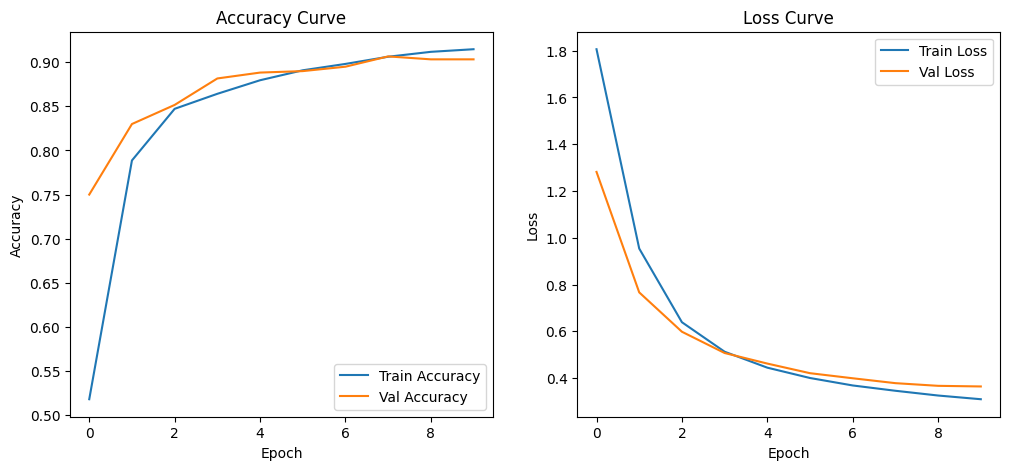

In [224]:
# -----------------------------
# f) Plot training loss and accuracy
# -----------------------------

plt.figure(figsize=(12,5))

# Accuracy graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


# Loss graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


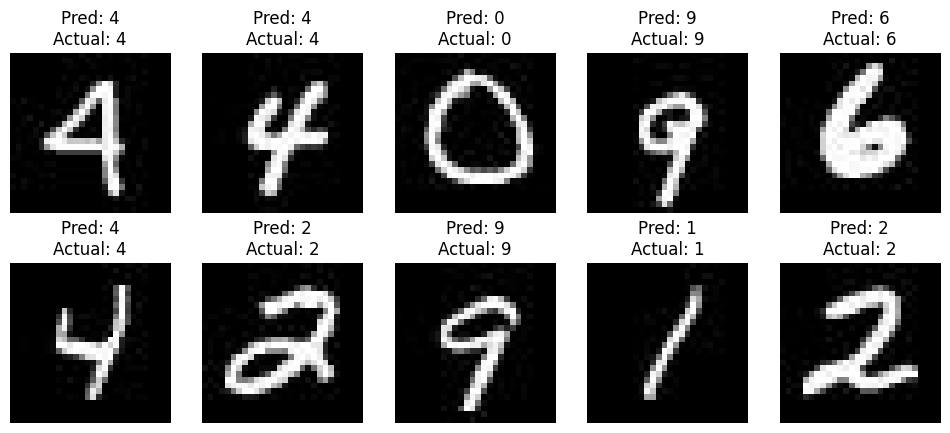

In [220]:
# -----------------------------
# g) Predict on test images
# -----------------------------

# Predict probabilities
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Show first 10 test images with predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {y_test[i]}")
    plt.axis('off')

plt.show()